# Model of primary in 2020

This Notebook is divided into three parts. 
* Part A: Feature selection to run the models accordingly to Logistic Regression assumptions.Then, we will run our first Models.
* Part B: We will add the 'actionable' features that were not adequate in Part A, and which we consider important.
* Part C: Do Train/ Test and MAPE metrcis to compare the models. Perform some outliers detection to improve performance.

In [1]:
# Scientific libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pingouin as pg


# model libraries 
from scipy.stats import chi2_contingency, norm
from scipy.stats import chi2_contingency, ttest_ind
import researchpy as rp
import scipy.stats as stats
# Model runners
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.outliers_influence

# Metrics options
from sklearn.metrics import roc_curve, auc

# Plotlib options
plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)
# Pandas options
pd.options.display.max_columns = None

In [2]:
# Dictionary with the purpose of reducing memory size when loading the dataset.
dict_tipos = {
# SIMAT
'ANO_INF':              'uint16',
'CODIGO_DANE':          'uint64',
'CODIGO_DANE_SEDE':     'uint64',
'TIPO_DOCUMENTO':       'uint8',
'NRO_DOCUMENTO':        'string',
'DIRECCION_RESIDENCIA': 'string',
'RES_DEPTO':            'uint8',
'RES_MUN':              'uint16',
'ESTRATO':              'uint8',
'SISBEN':               'float16',
'GENERO':               'uint8',
'POB_VICT_CONF':        'uint8',
'PROVIENE_SECTOR_PRIV': 'uint8',
'PROVIENE_OTR_MUN':     'uint8',
'TIPO_DISCAPACIDAD':    'uint8',
'CAP_EXC':              'uint8',
'CODIGO_ETNIA':         'uint16',
'CODIGO_JORNADA':       'uint8',
'CARACTER':             'uint8',
'CODIGO_ESPECIALIDAD':  'uint8',
'CODIGO_GRADO':         'int8',
'CODIGO_METODOLOGIA':   'uint8',
'REPITENTE':            'uint8',
'SIT_ACAD_ANIO_ANT':    'uint8',
'CON_ALUM_ANIO_ANT':    'uint8',
'ZONA_RESI_ALU':        'uint8',
'EDAD':                 'uint8',
'NIVEL':                'uint8',
'DIR_NUM_LOCALIDAD':    'uint8',
'NIVEL_SISBEN':         'uint8',
'GRADO_OVERAGE':        'uint8',
'OVERAGE':              'uint8',
# SISBEN
'ficha':                'int64',
'comuna':               'uint8',
'barrio':               'uint32',
'nombarrio':            'string',
'direcc':               'string',
'vereda':               'uint8',
'nomvereda':            'string',
'vivienda':             'uint8',
'pared':                'uint8',
'piso':                 'uint8',
'energia':              'uint8',
'alcanta':              'uint8',
'gas':                  'uint8',
'telefono' :            'uint8',
'basura' :              'uint8',
'acueduc' :             'uint8',
'estrato' :             'uint8',
'elimbasura' :          'uint8',
'tcuartosvi' :          'uint8',
'thogar' :              'uint8',
'recolec' :             'uint8',
'tipdir' :              'uint8',
'verifica' :            'uint8',
'hogar' :               'uint8',
'teneviv' :             'uint8',
'tcuartos' :            'uint8',
'tdormir' :             'uint8',
'sanitar' :             'uint8',
'usanitar' :            'uint8',
'usosani' :             'uint8',
'tsanitar' :            'uint8',
'ducha' :               'uint8',
'agua' :                'uint8',
'llega' :               'uint8',
'cuandi' :              'uint8',
'suminis' :             'uint8',
'cuanhoras' :           'uint8',
'preparan' :            'uint8',
'cocina' :              'uint8',
'cocinan' :             'uint8',
'alumbra' :             'uint8',
'usotele' :             'uint8',
'nevera' :              'uint8',
'lavadora' :            'uint8',
'tvcolor' :             'uint8',
'tvcable' :             'uint8',
'calenta' :             'uint8',
'horno' :               'uint8',
'aire' :                'uint8',
'computador' :          'uint8',
'equipo' :              'uint8',
'moto' :                'uint8',
'tractor' :             'uint8',
'tiene_auto' :          'uint8',
'bieraices':            'uint8',
'tpersona' :            'uint8',
'informan' :            'uint8',
'orden' :               'uint8',
'nucleo' :              'uint8',
'parentes' :            'uint8',
'tipodoc' :             'uint8',
'documen':              'string',
'sexo' :                'uint8',
'estcivil' :            'uint8',
'discapa' :             'uint8',
'carnet' :              'uint8',
'asiste' :              'uint8',
'tipoesta' :            'uint8',
'grado' :               'uint8',
'nivel' :               'uint8',
'activi' :              'uint8',
'buscando' :            'uint8',
'ingresos':             'int64',
'edad':                 'uint8',
'conyuvive':            'uint8',
'hijosde':              'int8',
'embaraza' :            'uint8',
'extranjero' :          'uint8',
'pagapor' :             'uint8',
'percibe' :             'uint8',
'serdomes' :            'uint8',
'unigasto' :            'uint8',
'area' :                'uint8',
'nparentes':            'uint8',
'puntaje_sisben_3':     'float32',
'todos_servicios_Pub':  'uint8',
'indice_hacinamiento':  'float16',
# C-600  
'ES_BILIGUE':           'int8',
'TOTAL_DOCENTES':       'uint16',
'TOTAL_ALUMNOS':        'uint16',
'TOTAL_EQUIPO_COMPUTO': 'uint16',
'TOTAL_DOCENTES_CON_TITULO':'uint8',
# ICFES
'num_presentaron_ICFES': 'uint8'
  }




In [3]:
df = pd.read_csv('../data/3-oro/Merge_2020_ICFES_C600.csv' , index_col=0, dtype = dict_tipos)

In [4]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457047 entries, 0 to 457046
Columns: 130 entries, ANO_INF to num_presentaron_ICFES
dtypes: float16(2), float32(1), float64(4), int64(3), int8(2), object(2), string(5), uint16(6), uint32(1), uint64(2), uint8(102)
memory usage: 115.1+ MB


In [5]:
df.head(1)

,ANO_INF,CODIGO_DANE,CODIGO_DANE_SEDE,TIPO_DOCUMENTO,NRO_DOCUMENTO,DIRECCION_RESIDENCIA,RES_DEPTO,RES_MUN,ESTRATO,SISBEN,FECHA_NACIMIENTO,GENERO,POB_VICT_CONF,PROVIENE_SECTOR_PRIV,PROVIENE_OTR_MUN,TIPO_DISCAPACIDAD,CAP_EXC,CODIGO_ETNIA,CODIGO_JORNADA,CARACTER,CODIGO_ESPECIALIDAD,CODIGO_GRADO,CODIGO_METODOLOGIA,REPITENTE,SIT_ACAD_ANIO_ANT,CON_ALUM_ANIO_ANT,ZONA_RESI_ALU,EDAD,NIVEL,DIR_NUM_LOCALIDAD,NIVEL_SISBEN,GRADO_OVERAGE,OVERAGE,ficha,comuna,barrio,nombarrio,direcc,vereda,nomvereda,vivienda,pared,piso,energia,alcanta,gas,telefono,basura,acueduc,estrato,elimbasura,tcuartosvi,thogar,recolec,tipdir,verifica,hogar,teneviv,tcuartos,tdormir,sanitar,usanitar,usosani,tsanitar,ducha,agua,llega,cuandi,suminis,cuanhoras,preparan,cocina,cocinan,alumbra,usotele,nevera,lavadora,tvcolor,tvcable,calenta,horno,aire,computador,equipo,moto,tractor,tiene_auto,bieraices,tpersona,informan,orden,nucleo,parentes,tipodoc,sexo,estcivil,discapa,carnet,asiste,tipoesta,grado,nivel,activi,buscando,ingresos,edad,conyuvive,hijosde,embaraza,extranjero,pagapor,percibe,serdomes,unigasto,area,nparentes,puntaje_sisben_3,nivel_hacinamiento,todos_servicios_Pub,indice_hacinamiento,ES_BILINGUE,TOTAL_DOCENTES,TOTAL_ALUMNOS,TOTAL_EQUIPO_COMPUTO,ALUMN_POR_DOCENTE,COMPU_POR_ALUMN,TOTAL_DOCENTES_CON_TITULO,PROP_DOCENTES_CON_TITULO,promepuntaje,num_presentaron_ICFES
0,2020,111001000078,111001000078,2,1000004716,CL 29 A SUR # 50 - 41 PL 2,11,1,3,29.0,2003-04-14,0,99,0,0,0,9,0,6,1,5,10,1,0,1,9,1,16,4,16,1,100,0,4304159,16,4407,ALCALA,CL 33 SUR 51 A 47 PI 1 CU 1,0,BARRIO ZONA URBANA,2,1,2,1,1,1,2,1,1,3,1,2,1,3,1,1,1,1,2,2,1,1,2,1,1,1,1,0,1,0,1,2,2,1,0,1,1,1,2,2,2,2,0,2,0,0,0,1,5,2,4,1,3,2,0,5,0,0,1,4,3,1,3,0,0,8,0,0,0,0,0,0,0,1,1,3,29.440001,Hacinamiento_medio,1,2.5,0,27,627,231,23.222222,0.368421,24,0.888889,262.909091,33


In [6]:
df["POB_VICT_CONF"].value_counts()

99    442309
1      13545
10       409
3        245
9        187
4        126
2         97
18        68
17        40
7          5
20         5
6          4
12         2
15         2
8          1
13         1
21         1
Name: POB_VICT_CONF, dtype: int64

In [7]:
dict_vict_recod = {
    99: 0,
    1: 1, 
    10: 1,
    3: 1,
    9: 1,
    4: 1,
    2: 1,
    18: 1,
    17: 1,
    7: 1,
    20: 1,
    6: 1,
    12: 1,
    15: 1,
    8: 1,
    13: 1,
    21: 1
}

In [8]:
df['POB_VICT_CONF'] = df['POB_VICT_CONF'].replace(dict_vict_recod)

## Initial Variables (le borré ingresos y recategorice POB_VICT_CONF

In [9]:
# variables = ['EDAD',
#             'GRADO_OVERAGE', #-> solo si no se incluye OVERAGE en Categoricas
#             'estrato',
#             'puntaje_sisben_3',
#             'indice_hacinamiento', #-> solo si no se pone nivel_hacinamiento en Categorias
#             #'TOTAL_DOCENTES',
#             #'TOTAL_ALUMNOS',
#             'TOTAL_EQUIPO_COMPUTO',
#             'ALUMN_POR_DOCENTE',
#             'COMPU_POR_ALUMN',
#             'TOTAL_DOCENTES_CON_TITULO',
 #            'PROP_DOCENTES_CON_TITULO', #-> solo si no se incluye TOTAL_DOCENTES_CON_TITULO y TOTAL_ALUM al tiempo
  #           'promepuntaje',
   #          'num_presentaron_ICFES'
    #        ]
#
#
#categorias= ['GENERO',
 #            'POB_VICT_CONF',
  #           'PROVIENE_SECTOR_PRIV',
  #           'PROVIENE_OTR_MUN',
  #           'TIPO_DISCAPACIDAD',
  #           'CAP_EXC',
  #           'CODIGO_ETNIA',
  #           'CODIGO_JORNADA',
  #           'CARACTER',
  #           # 'NIVEL', #-> Se esta filtrando por Nivel
  #           'CODIGO_GRADO',
  #           # 'CODIGO_METODOLOGIA', #No se inclye porque se filtra por este valor
  #          'SIT_ACAD_ANIO_ANT',
  #           'CON_ALUM_ANIO_ANT',
  #           'ZONA_RESI_ALU',
  #           'DIR_NUM_LOCALIDAD',
  #           #'OVERAGE', # si no se incluye GRADO_OVERAGE
   #          'vivienda',
  #           'embaraza',
  #           'nparentes',
  #           'todos_servicios_Pub',
  #           'teneviv',
  #           'computador',
  #           'tiene_auto',
  #           'ES_BILINGUE',
             #'nivel_hacinamiento',
             #'OVERAGE',

   #          ]

In [10]:
variables = ['EDAD',
             'estrato',
             'puntaje_sisben_3',
             'indice_hacinamiento', #-> solo si no se pone nivel_hacinamiento en Categoria
             'TOTAL_EQUIPO_COMPUTO',
             'ALUMN_POR_DOCENTE',
             'COMPU_POR_ALUMN',
             'TOTAL_DOCENTES_CON_TITULO',
             'PROP_DOCENTES_CON_TITULO', #-> solo si no se incluye TOTAL_DOCENTES_CON_TITULO y TOTAL_ALUM al tiempo
             'promepuntaje',
            ]

categorias= ['GENERO',
             'POB_VICT_CONF',
             'PROVIENE_OTR_MUN',
             'TIPO_DISCAPACIDAD',
             'CODIGO_ETNIA',
             'CODIGO_JORNADA',
             'DIR_NUM_LOCALIDAD',
             'embaraza',
             'todos_servicios_Pub',
             'teneviv',
             'computador',
             'tiene_auto',
             'ES_BILINGUE'

             ]


# Part A: Feature Selection

## Filter by grade Level and Methodology

In [11]:
df['NIVEL'].value_counts()/df['NIVEL'].shape[0]

2    0.403860
3    0.398370
4    0.142274
1    0.055495
Name: NIVEL, dtype: float64

In [12]:
df = df[(df['NIVEL']== 2)]

In [13]:
df['CODIGO_METODOLOGIA'].value_counts()/df['CODIGO_METODOLOGIA'].shape[0]

1    0.970263
9    0.029737
Name: CODIGO_METODOLOGIA, dtype: float64

In [14]:
df = df[(df['CODIGO_METODOLOGIA']==1)]

-----------

# Univariate Feature Selection for categorical data
## Pearson Chi-Squared Test For independence
### Part I: Features with dependence against REPITENTE

$$ H_{0} : The \: variables \: are \: Dependent$$
$$ H_{a}: The \: variables \:are \: not \: Dependent $$

#### References:
1. [Why Chi Test?](https://towardsdatascience.com/mistakes-in-applying-univariate-feature-selection-methods-34c43ce8b93d)
2. [Why we implemented it in this way?](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)

In [15]:
chi2_values_df = pd.DataFrame(columns = ['Category', 'p-value'])
cat_dep = []
p_values = []
for i in categorias:
    crosstab = pd.crosstab(df['REPITENTE'], df[i])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    if p <= 0.05:
        cat_dep.append(i)
        p_values.append(p)
print('Dependent variables that reject H0 at a significance level of 5%')
chi2_values_df['Category'] = cat_dep
chi2_values_df['p-value'] = p_values
print(chi2_values_df.sort_values(by = 'p-value'))
    

Dependent variables that reject H0 at a significance level of 5%
               Category       p-value
0                GENERO  1.314078e-58
5     DIR_NUM_LOCALIDAD  1.045395e-49
4        CODIGO_JORNADA  5.406144e-32
3     TIPO_DISCAPACIDAD  5.247169e-28
8            computador  2.093791e-23
6   todos_servicios_Pub  1.809878e-20
1         POB_VICT_CONF  2.577196e-08
9            tiene_auto  5.091870e-07
7               teneviv  6.452112e-07
10          ES_BILINGUE  1.066005e-03
2      PROVIENE_OTR_MUN  1.256208e-02


In [16]:
categorias = cat_dep

In [17]:
rejected = pd.DataFrame(columns = ['Category', 'p-value'])
cat_nodep = []
p_valuesr = []
for i in categorias:
    crosstab = pd.crosstab(df['REPITENTE'], df[i])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    if p > 0.05:
        cat_nodep.append(i)
        p_valuesr.append(p)
print('Variables that fail to reject H0 (independent) at a significance level of 5%')
rejected['Category'] = cat_nodep
rejected['p-value'] = p_valuesr
print(rejected.sort_values(by = 'p-value', ascending = False))

Variables that fail to reject H0 (independent) at a significance level of 5%
Empty DataFrame
Columns: [Category, p-value]
Index: []


# Univariate Feature Selection for continous data
## Difference in means test 
### Part I: Features with dependence against REPITENTE

In [18]:
differentMean = pd.DataFrame(columns = ['numeric', 'p-value'])
cat_con = []
p_valuesc = []

for i in variables:
    df_r = df[df["REPITENTE"] == 1][i]
    df_nr = df[df["REPITENTE"] == 0][i]
    p_val = float(pg.ttest(df_r,df_nr)["p-val"][0])
    
    if p_val <= 0.05:
        cat_con.append(i)
        p_valuesc.append(p_val)
        
print('Dependent variables that reject H0 at a significance level of 5%')
differentMean['numeric'] = cat_con
differentMean['p-value'] = p_valuesc
print(differentMean.sort_values(by = 'p-value'))


/opt/conda/lib/python3.8/site-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:211: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)
/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Dependent variables that reject H0 at a significance level of 5%
                     numeric       p-value
0                       EDAD  0.000000e+00
2           puntaje_sisben_3  1.798049e-59
1                    estrato  3.385782e-25
6               promepuntaje  2.864782e-20
5   PROP_DOCENTES_CON_TITULO  2.845982e-08
4  TOTAL_DOCENTES_CON_TITULO  2.790442e-04
3       TOTAL_EQUIPO_COMPUTO  3.932783e-02


--------

### Part II: Feature selection for continuous variables
We could perform an ANOVA F-test to do this feature selection. Since we have very few continous data, and other assumptions need to be checked we skip this step for now.

## Model: Logistic Regression
### Assumptions:
1. Right response variable. This is obvious since REPITENTE is boolean.
2. Linearility of continuous variables agaisnt log(odds) = $ln(\dfrac{p}{1-p})$
3. Not strongly influential Outliers.
4. Absence of Multicollinearity
5. Independence of observations

[Reference](https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290)

## Assumptions checks 

### Number II: Linearility versus log (odds) - Box- Tidwell Test

The intituion behind this test is very clear. We are trying to test if the probability of seeing a success (occurence of a 1 value) is exponentially related to our variables. In other words, we expect that:
   $$ Y = ln(\dfrac{p}{1-p}) \approx \beta_{0} + \sum_{i=1}^{n}x_{i}\beta_{i} $$
Where p is the probability of a success, i.e. the number of positive outcomes divided by the total of observations in a given sample of the population.

**Box- Tidwell Test**

In [19]:
y = df['REPITENTE']
y.shape

(179094,)

In [20]:
X = df[variables]
X.shape

(179094, 10)

In [21]:
# 0 and 1 are interchangable since in either case value*ln(value) = 0
X.replace({0: 1, 0.0 : 1.0}, inplace = True)

/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [22]:
for var in variables:
    X[f'{var}:Log_{var}'] = X[var].apply(lambda x: x * np.log(x))

<ipython-input-22-a73a6ccc77d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f'{var}:Log_{var}'] = X[var].apply(lambda x: x * np.log(x))


In [23]:
cols_to_keep = variables + X.columns.tolist()[-len(variables):]

In [24]:
X_cons = sm.add_constant(X, prepend=False)

In [25]:
## Should not print anything
for col in X_cons:
    if np.isinf(X_cons[col]).values.sum() > 0:
        print(col)

In [26]:
## Shouel not print anything, otherwise an error will raise in the next cell
for col in X_cons:
    if np.isnan(X_cons[col]).values.sum() > 0:
        print(col, np.isnan(X_cons[col]).values.sum())

In [27]:
logit_results = sm.GLM(y, X_cons, family=sm.families.Binomial()).fit()
logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               179094
Model:                            GLM   Df Residuals:                   179073
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25888.
Date:                Mon, 04 Jul 2022   Deviance:                       51777.
Time:                        18:41:15   Pearson chi2:                 1.78e+05
No. Iterations:                     7   Pseudo R-squ. (CS):            0.01396
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
EDAD                                                        1.2524      0.122     10.271      0.000       1.013       1.491
estrato                                                    -0.3127      0.165     -1.891      0.059      -0.637       0.011
puntaje_sisben_3                                            0.0357      0.015      2.423      0.015       0.007       0.065
indice_hacinamiento                                         0.1096      0.066      1.670      0.095      -0.019       0.238
TOTAL_EQUIPO_COMPUTO                                        0.0060      0.001      4.074      0.000       0.003       0.009
ALUMN_POR_DOCENTE                                           0.6101      0.099      6.136      0.000       0.415       0.805
COMPU_POR_ALUMN                                             0.2650      0.110      2.400      0.016       0.049       0.481
TOTAL_DOCENTES_CON_TITULO                                  -0.0257      0.005     -5.160      0.000      -0.035      -0.016
PROP_DOCENTES_CON_TITULO                                    1.5149      0.117     12.955      0.000       1.286       1.744
promepuntaje                                                0.8047      0.153      5.259      0.000       0.505       1.105
EDAD:Log_EDAD                                              -0.2919      0.037     -7.854      0.000      -0.365      -0.219
estrato:Log_estrato                                         0.0898      0.103      0.871      0.384      -0.112       0.292
puntaje_sisben_3:Log_puntaje_sisben_3                      -0.0095      0.003     -2.929      0.003      -0.016      -0.003
indice_hacinamiento:Log_indice_hacinamiento                -0.0101      0.027     -0.378      0.706      -0.063       0.042
TOTAL_EQUIPO_COMPUTO:Log_TOTAL_EQUIPO_COMPUTO              -0.0009      0.000     -4.094      0.000      -0.001      -0.000
ALUMN_POR_DOCENTE:Log_ALUMN_POR_DOCENTE                    -0.1438      0.024     -6.110      0.000      -0.190      -0.098
COMPU_POR_ALUMN:Log_COMPU_POR_ALUMN                         0.4091      0.294      1.390      0.165      -0.168       0.986
TOTAL_DOCENTES_CON_TITULO:Log_TOTAL_DOCENTES_CON_TITULO     0.0046      0.001      4.829      0.000       0.003       0.006
PROP_DOCENTES_CON_TITULO:Log_PROP_DOCENTES_CON_TITULO      -2.2914      0.222    -10.322      0.000      -2.726      -1.856
promepuntaje:Log_promepuntaje                              -0.1236      0.023     -5.272      0.000      -0.170      -0.078
const                                                     -44.2066      5.858     -7.546      0.000     -55.688     -32.725
===========================================================================================================

In [28]:
logit_results.pvalues

EDAD                                                       9.506005e-25
estrato                                                    5.860125e-02
puntaje_sisben_3                                           1.538836e-02
indice_hacinamiento                                        9.499070e-02
TOTAL_EQUIPO_COMPUTO                                       4.612725e-05
ALUMN_POR_DOCENTE                                          8.468335e-10
COMPU_POR_ALUMN                                            1.639534e-02
TOTAL_DOCENTES_CON_TITULO                                  2.464036e-07
PROP_DOCENTES_CON_TITULO                                   2.206543e-38
promepuntaje                                               1.446745e-07
EDAD:Log_EDAD                                              4.044532e-15
estrato:Log_estrato                                        3.835708e-01
puntaje_sisben_3:Log_puntaje_sisben_3                      3.397877e-03
indice_hacinamiento:Log_indice_hacinamiento                7.055

In [29]:
logit_results.pvalues[logit_results.pvalues > 0.05]

estrato                                        0.058601
indice_hacinamiento                            0.094991
estrato:Log_estrato                            0.383571
indice_hacinamiento:Log_indice_hacinamiento    0.705523
COMPU_POR_ALUMN:Log_COMPU_POR_ALUMN            0.164625
dtype: float64

In [30]:
logit_results.pvalues[logit_results.pvalues > 0.05].index

Index(['estrato', 'indice_hacinamiento', 'estrato:Log_estrato',
       'indice_hacinamiento:Log_indice_hacinamiento',
       'COMPU_POR_ALUMN:Log_COMPU_POR_ALUMN'],
      dtype='object')

In [31]:
conti = []
for x in logit_results.pvalues[logit_results.pvalues > 0.05].index:
    if ":" in x:
        aux = x.split(':')
        conti.append(aux[0])
conti

['estrato', 'indice_hacinamiento', 'COMPU_POR_ALUMN']

In [32]:
# Select the continuous variables that fulfill the second assumption for the model
variables = conti

-------------------------

#### Comparasion against smf.logit

We can see that the results are equivalent

In [33]:
def formula_odds(dependiente, variables):
    formula = f'{dependiente} ~ '
    for variable in variables:
        if formula != f'{dependiente} ~ ':
            formula += ' + '
        formula += f'{variable}'
        formula += f' + {variable} : np.log({variable})'
    return formula  

In [34]:
X_cons['REPITENTE'] = y

In [35]:
formula = formula_odds('REPITENTE', variables)
formula

'REPITENTE ~ estrato + estrato : np.log(estrato) + indice_hacinamiento + indice_hacinamiento : np.log(indice_hacinamiento) + COMPU_POR_ALUMN + COMPU_POR_ALUMN : np.log(COMPU_POR_ALUMN)'

In [36]:
model= smf.logit(formula=formula, data= X_cons).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.150686
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               179094
Model:                          Logit   Df Residuals:                   179087
Method:                           MLE   Df Model:                            6
Date:                Mon, 04 Jul 2022   Pseudo R-squ.:                0.005891
Time:                        18:41:16   Log-Likelihood:                -26987.
converged:                       True   LL-Null:                       -27147.
Covariance Type:            nonrobust   LLR p-value:                 4.544e-66
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                          -3.5293      0.211    -16.745      0.000      -3.942      -3.116
estrato                                            -0.3264      0.163     -2.004      0.045      -0.646      -0.007
estrato:np.log(estrato)                             0.0866      0.102      0.853      0.394      -0.112       0.286
indice_hacinamiento                                 0.2376      0.063      3.778      0.000       0.114       0.361
indice_hacinamiento:np.log(indice_hacinamiento)    -0.0487      0.026     -1.876      0.061      -0.100       0.002
COMPU_POR_ALUMN                                     0.1334      0.097      1.375      0.169      -0.057       0.324
COMPU_POR_ALUMN:np.log(COMPU_POR_ALUMN)            -0.4727      0.180     -2.625      0.009      -0.826      -0.120
===================================================================================================================
"""

In [37]:
model.pvalues[model.pvalues > 0.05]

estrato:np.log(estrato)                            0.393878
indice_hacinamiento:np.log(indice_hacinamiento)    0.060590
COMPU_POR_ALUMN                                    0.169018
dtype: float64

-------------------------

### Number III: Outliers 
For the purpose of detecting outliers we will use two methods. Based on the same reference as in the assumptions, we consider the Cooks distance and the rule of thumb of three std.

In [38]:
all_variables = variables + categorias
y = df['REPITENTE']
X = df[all_variables]


In [39]:
logit_results = sm.GLM(y, X, family=sm.families.Binomial()).fit()
logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               179094
Model:                            GLM   Df Residuals:                   179080
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27447.
Date:                Mon, 04 Jul 2022   Deviance:                       54895.
Time:                        18:41:18   Pearson chi2:                 2.19e+05
No. Iterations:                     7   Pseudo R-squ. (CS):          -0.003361
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
estrato                -0.6452      0.017    -37.524      0.000      -0.679      -0.611
indice_hacinamiento    -0.0650      0.008     -7.670      0.000      -0.082      -0.048
COMPU_POR_ALUMN        -0.1542      0.134     -1.148      0.251      -0.417       0.109
GENERO                  0.2173      0.025      8.733      0.000       0.168       0.266
POB_VICT_CONF           0.1379      0.066      2.084      0.037       0.008       0.268
PROVIENE_OTR_MUN        0.2583      0.121      2.136      0.033       0.021       0.495
TIPO_DISCAPACIDAD       0.5387      0.055      9.798      0.000       0.431       0.646
CODIGO_JORNADA         -0.2908      0.012    -24.503      0.000      -0.314      -0.268
DIR_NUM_LOCALIDAD      -0.0320      0.002    -14.491      0.000      -0.036      -0.028
todos_servicios_Pub    -0.7251      0.028    -26.300      0.000      -0.779      -0.671
teneviv                -0.1810      0.014    -12.682      0.000      -0.209      -0.153
computador             -0.2834      0.045     -6.352      0.000      -0.371      -0.196
tiene_auto             -0.3392      0.148     -2.287      0.022      -0.630      -0.049
ES_BILINGUE            -0.2465      0.084     -2.927      0.003      -0.412      -0.081
=======================================================================================
"""

In [40]:
# Get influence measures
influence = logit_results.get_influence()

In [41]:
# Obtain summary df of influence measures
summ_df = influence.summary_frame()
# Filter summary df to Cook's distance values only
diagnosis_df = summ_df[['cooks_d']]

# Set Cook's distance threshold
cook_threshold = 4 / len(X)

In [42]:
# Append absolute standardized residual values 
diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df['std_resid'].apply(lambda x: np.abs(x))

<ipython-input-42-915f4f9d121e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
<ipython-input-42-915f4f9d121e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df['std_resid'] = diagnosis_df['std_resid'].apply(lambda x: np.abs(x))


In [43]:
# Find observations which are BOTH outlier (std dev > 3) and highly influential
extreme = diagnosis_df[(diagnosis_df['cooks_d'] > cook_threshold) & 
                       (diagnosis_df['std_resid'] > 3)]

In [44]:
# Show top 5 highly influential outlier observations
extreme.sort_values("cooks_d", ascending=False).head()

,cooks_d,std_resid
108907,0.002630,19.854342
453512,0.002041,4.971553
261107,0.002027,8.460149
261270,0.001995,5.455085
72405,0.001965,4.501767


In [45]:
extreme.shape

(5749, 2)

In [46]:
extreme.index

Int64Index([   333,    367,    399,    401,    418,    421,    481,   1036,
              1037,   1038,
            ...
            451590, 453431, 453438, 453512, 453871, 453897, 453915, 455346,
            455405, 455462],
           dtype='int64', length=5749)

In [47]:
df.index

Int64Index([   321,    322,    324,    326,    327,    328,    329,    332,
               333,    334,
            ...
            455465, 455467, 455468, 455469, 455471, 455474, 455476, 455477,
            455478, 455482],
           dtype='int64', length=179094)

In [48]:
# Delete undesirable outliers
df = df.loc[~df.index.isin(extreme.index)]

In [49]:
df.index

Int64Index([   321,    322,    324,    326,    327,    328,    329,    332,
               334,    336,
            ...
            455465, 455467, 455468, 455469, 455471, 455474, 455476, 455477,
            455478, 455482],
           dtype='int64', length=173345)

---------------


## Number IV: Absence of Multicolinearility

 ### Continuous variables
 From the graph below it is clear that no continuous variable presents multilinearity with each other

<ipython-input-50-5d64253ecffd>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df[variables].corr(), dtype=np.bool))


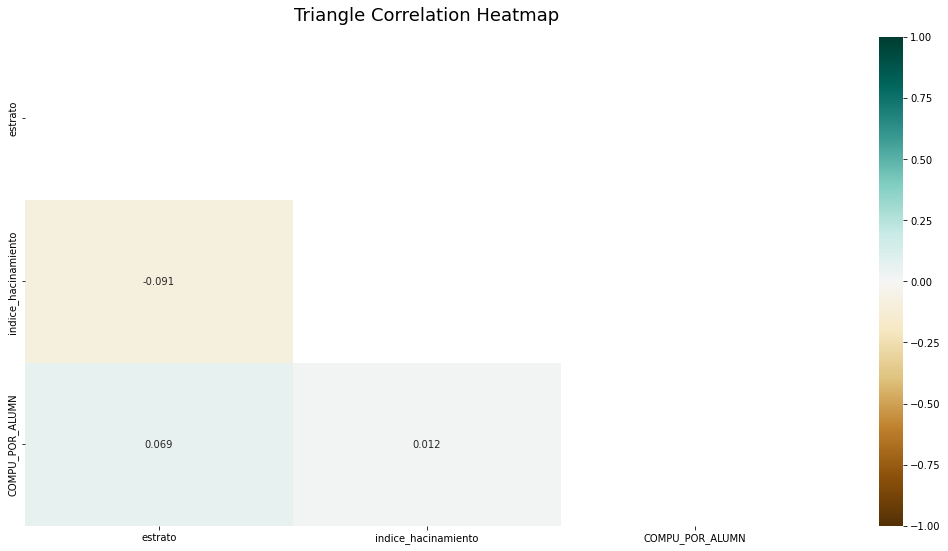

In [50]:
plt.figure(figsize=(18, 9))
# define the mask to set the values in the upper triangle to True

mask = np.triu(np.ones_like(df[variables].corr(), dtype=np.bool))
heatmap = sns.heatmap(df[variables].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Use variance inflation factor to identify any significant multi-collinearity
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calc_vif(df[variables])

,variables,VIF
0,estrato,4.643773
1,indice_hacinamiento,3.959968
2,COMPU_POR_ALUMN,3.000056


In [52]:
aux_multico = []
multi_df = calc_vif(df[variables])
for i in range(len(multi_df)):
    name = multi_df['variables'][i]
    value= multi_df['VIF'][i]
    if value >= 10: # The statndard rule to discard a variable is: VIF >5
        aux_multico.append(name)
variables = list(set(variables) - set(aux_multico))

In [53]:
variables

['indice_hacinamiento', 'COMPU_POR_ALUMN', 'estrato']

## Number V: Independence of Observations for categorical Data (since continuous ones were treated already)
In this case the more appropiate thing to do is run a Chi-Squared test between all the categorical predictores and see which pairs are plausible.

In [54]:
def puntaje(x , categorias):
    pun= 0
    for i in categorias:
        crosstab = pd.crosstab(x, df[i])
        chi2, p, dof, ex = stats.chi2_contingency(crosstab)
        if p > 0.05:
            pun += 1
    return pun

In [55]:
independent = pd.DataFrame(columns = ['Category', 'counts'])
cats = categorias
counts = []
for j in categorias:
    counts.append(puntaje(df[j], categorias));
   
independent['Category'] = categorias
independent['counts'] = counts
independent = independent.sort_values(by = 'counts', ascending = False)
independent

,Category,counts
0,GENERO,8
2,PROVIENE_OTR_MUN,6
3,TIPO_DISCAPACIDAD,5
10,ES_BILINGUE,4
1,POB_VICT_CONF,3
8,computador,3
9,tiene_auto,3
6,todos_servicios_Pub,2
4,CODIGO_JORNADA,1
7,teneviv,1


In [56]:
independent['Below'] = independent['Category'].shift(-1)
independent

,Category,counts,Below
0,GENERO,8,PROVIENE_OTR_MUN
2,PROVIENE_OTR_MUN,6,TIPO_DISCAPACIDAD
3,TIPO_DISCAPACIDAD,5,ES_BILINGUE
10,ES_BILINGUE,4,POB_VICT_CONF
1,POB_VICT_CONF,3,computador
8,computador,3,tiene_auto
9,tiene_auto,3,todos_servicios_Pub
6,todos_servicios_Pub,2,CODIGO_JORNADA
4,CODIGO_JORNADA,1,teneviv
7,teneviv,1,DIR_NUM_LOCALIDAD


In [57]:
independent = independent.reset_index()

In [58]:
vals = []
for i in range(len(independent['Category'])-1):
    crosstab = pd.crosstab(df[independent['Category'][i]], df[independent['Below'][i]])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    vals.append(p)    

In [59]:
vals.append(1)

In [60]:
independent['p_values'] = vals

In [61]:
independent

,index,Category,counts,Below,p_values
0,0,GENERO,8,PROVIENE_OTR_MUN,8.568079e-01
1,2,PROVIENE_OTR_MUN,6,TIPO_DISCAPACIDAD,8.237593e-01
2,3,TIPO_DISCAPACIDAD,5,ES_BILINGUE,7.638098e-02
3,10,ES_BILINGUE,4,POB_VICT_CONF,7.773278e-01
4,1,POB_VICT_CONF,3,computador,2.353114e-31
5,8,computador,3,tiene_auto,0.000000e+00
6,9,tiene_auto,3,todos_servicios_Pub,7.427328e-47
7,6,todos_servicios_Pub,2,CODIGO_JORNADA,1.190149e-13
8,4,CODIGO_JORNADA,1,teneviv,8.550493e-50
9,7,teneviv,1,DIR_NUM_LOCALIDAD,0.000000e+00


In [62]:
cat_iid = []
for i in range(independent.shape[0]):
    cat_iid.append(independent['Category'][i])
    if independent['p_values'][i] <= 0.05:
        print(i)
        break

4


In [63]:
cat_iid

['GENERO',
 'PROVIENE_OTR_MUN',
 'TIPO_DISCAPACIDAD',
 'ES_BILINGUE',
 'POB_VICT_CONF']

In [64]:
categorias = cat_iid

------------------

### Run Models

In [65]:
def formula_maker(dependiente, variables, categorias):
    formula = f'{dependiente} ~ '
    for variable in variables:
        if formula != f'{dependiente} ~ ':
            formula += ' + '
        formula += f'{variable}'
    for categoria in categorias:
        if formula != f'{dependiente} ~ ':
            formula += ' + '
        formula += f'C({categoria})'
    return formula  

In [66]:
formula=formula_maker('REPITENTE', variables, categorias)
model= smf.logit(formula= formula, data= df).fit() # Add if method='bfgs' if singular Matrix appears
model.summary()

Optimization terminated successfully.
         Current function value: 0.017082
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               173345
Model:                          Logit   Df Residuals:                   173336
Method:                           MLE   Df Model:                            8
Date:                Mon, 04 Jul 2022   Pseudo R-squ.:                  0.1524
Time:                        18:41:30   Log-Likelihood:                -2961.1
converged:                       True   LL-Null:                       -3493.5
Covariance Type:            nonrobust   LLR p-value:                1.526e-224
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -3.8571      0.192    -20.109      0.000      -4.233      -3.481
C(GENERO)[T.1]                1.2443      0.110     11.290      0.000       1.028       1.460
C(PROVIENE_OTR_MUN)[T.1]      0.9636      0.303      3.178      0.001       0.369       1.558
C(TIPO_DISCAPACIDAD)[T.1]     1.8191      0.116     15.619      0.000       1.591       2.047
C(ES_BILINGUE)[T.1]          -0.7090      0.414     -1.711      0.087      -1.521       0.103
C(POB_VICT_CONF)[T.1]         0.7282      0.167      4.364      0.000       0.401       1.055
indice_hacinamiento           0.0521      0.029      1.802      0.072      -0.005       0.109
COMPU_POR_ALUMN              -0.4333      0.442     -0.980      0.327      -1.300       0.433
estrato                      -2.0137      0.087    -23.219      0.000      -2.184      -1.844
=============================================================================================
"""

In [67]:
model.predict()

array([4.21749273e-05, 4.29127745e-05, 1.54180447e-04, ...,
       9.37305545e-03, 2.53682001e-03, 8.16737669e-03])

In [68]:
variables

['indice_hacinamiento', 'COMPU_POR_ALUMN', 'estrato']

In [69]:
categorias

['GENERO',
 'PROVIENE_OTR_MUN',
 'TIPO_DISCAPACIDAD',
 'ES_BILINGUE',
 'POB_VICT_CONF']

In [70]:
X = variables + categorias

In [71]:
df["prediction"] = model.predict(df[X])

In [72]:
df[X +["prediction"]]

,indice_hacinamiento,COMPU_POR_ALUMN,estrato,GENERO,PROVIENE_OTR_MUN,TIPO_DISCAPACIDAD,ES_BILINGUE,POB_VICT_CONF,prediction
321,1.000000,0.524904,3,0,0,0,0,0,0.000042
322,1.333008,0.524904,3,0,0,0,0,0,0.000043
324,2.000000,0.524904,3,1,0,0,0,0,0.000154
326,5.000000,0.524904,3,0,0,0,0,1,0.000108
327,1.333008,0.524904,3,1,0,0,0,0,0.000149
...,...,...,...,...,...,...,...,...,...
455474,3.000000,0.110204,2,1,0,1,0,0,0.008902
455476,2.000000,0.110204,2,0,0,1,0,0,0.002451
455477,4.000000,0.110204,2,1,0,1,0,0,0.009373
455478,2.666016,0.110204,2,0,0,1,0,0,0.002537


In [73]:
import math

In [74]:
lineal = (1*-3.857114) +  (3*-2.013717) +  (0.524904*-0.433340) + (1.000000*0.052084) + (0*1.244326) + (0*0.963557)+ (0*1.819143)+ (0*-0.709018)+(0*0.728171)

In [75]:
math.exp(lineal)/(1+math.exp(lineal))

4.217490950829295e-05

In [76]:
modelparams

NameError: name 'modelparams' is not defined

In [ ]:
formula=formula_maker('REPITENTE', variables, categorias)
model= smf.logit(formula= formula, data= df).fit(method = 'bfgs') # Add if method='bfgs' if singular Matrix appears
model.summary()

In [ ]:
all_vars = variables + categorias

In [ ]:
X = df[all_vars]

In [ ]:
X

In [ ]:
y = df['REPITENTE']
y

In [ ]:
X = pd.get_dummies(X, columns=categorias, drop_first=True)
X.head(2)

In [ ]:
logit_results = sm.GLM(y, X, family=sm.families.Binomial()).fit()
logit_results.summary()

In [ ]:
variables

In [ ]:
categorias

### Conclusions